In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.13281433 -0.19079727 -0.19583562 ...  0.08588138  0.040711
  0.01581939]
1326600


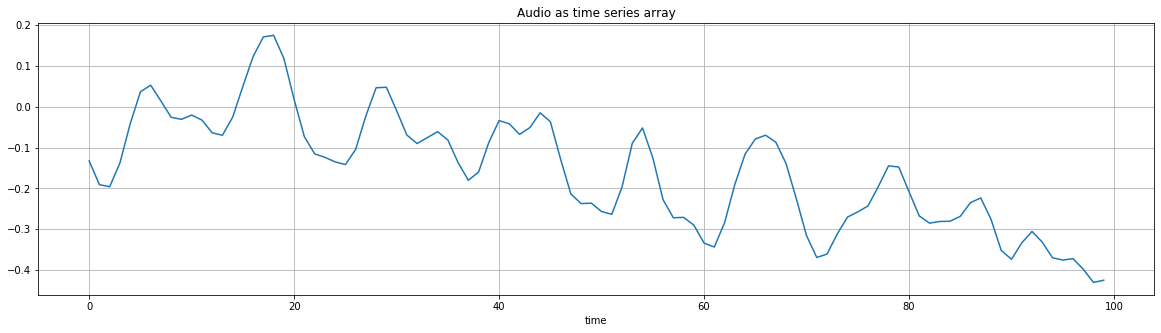

In [3]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="./data/genres_original/country/country.00000.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(20, 5))
plt.plot(x[0:100])
plt.title("Audio as time series array")
plt.xlabel("time")
plt.grid()

[[0.02755102 0.02782313 0.02827664 ... 0.03433107 0.03387755 0.03360544]]
Average ZCR: 0.05742311945354274
Standard ZCR: 0.014662946905030876


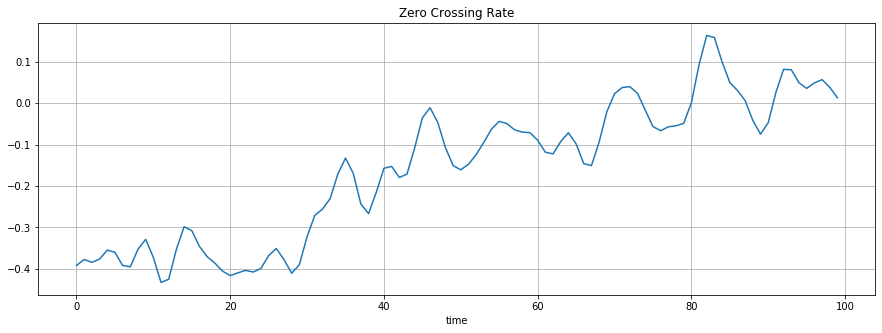

In [8]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x,44100)
print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("Zero Crossing Rate")
plt.xlabel("time")
plt.grid()

[2836.11305969 2662.09643491 2299.58625239 ... 2841.83670722 2711.56600753
 2683.29463012]
Spectral Centroid: 2545.641185857306


Text(0.5, 0, 'time')

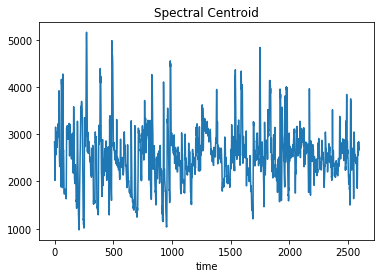

In [5]:
#spectral centroids
spcts = librosa.feature.spectral_centroid(x,44100)[0]
mean_spcts = np.mean(spcts)
print(spcts)
print("Spectral Centroid:",mean_spcts)
plt.plot(spcts)
plt.title("Spectral Centroid")
plt.xlabel("time")

[7149.0234375  6718.359375   5189.50195312 ... 6524.56054688 6416.89453125
 6459.9609375 ]
Mean Spectral Roll off: 5719.732157389323
Standard Spectral Roll off: 1388.2071374355385


Text(0.5, 0, 'time')

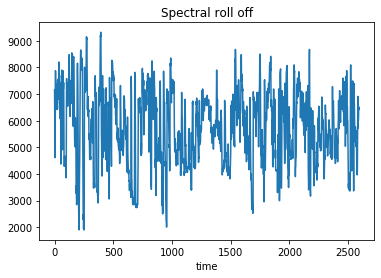

In [6]:
#spectral roll off
sprf = librosa.feature.spectral_rolloff(x,44100)[0]
mean_sprf = np.mean(sprf)
std_sprf = np.std(sprf)
print(sprf)
print("Mean Spectral Roll off:",mean_sprf)
print("Standard Spectral Roll off:",std_sprf)
plt.plot(sprf)
plt.title("Spectral roll off")
plt.xlabel("time")

In [9]:
import os
music_genres = 'country disco hiphop reggae rock'.split()
for genre in music_genres:
    count=0
    for music_file in os.listdir(f'./data/genres_original/{genre}'):
            audio_data = f'./data/genres_original/{genre}/{music_file}'
            x, sr = librosa.load(audio_data, sr=44100, mono=True, offset=5 , duration=35)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(x)
            spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
            print(f"{genre}  {music_file}  zcr={zero_crossing_rate} spc cen={spectral_centroid} spc ro={spectral_rolloff})")
            count=count+1
            if count>=10:
                break
            

country  country.00000.wav  zcr=[[0.03125    0.04589844 0.06494141 ... 0.09228516 0.07470703 0.05322266]] spc cen=[[2574.77056164 2621.25187117 2679.75291122 ... 2751.80898141
  2779.91472141 2679.00649464]] spc ro=[[5017.23632812 5620.16601562 5900.09765625 ... 6373.828125
  6438.42773438 6438.42773438]])
country  country.00001.wav  zcr=[[0.01513672 0.0234375  0.03076172 ... 0.09570312 0.09179688 0.06982422]] spc cen=[[2517.31983464 2334.00705475 2366.13616281 ... 3064.62388279
  3253.34907829 3364.70208528]] spc ro=[[6653.75976562 6223.09570312 6266.16210938 ... 6438.42773438
  6610.69335938 6610.69335938]])
country  country.00002.wav  zcr=[[0.00976562 0.01171875 0.01269531 ... 0.05712891 0.05029297 0.03271484]] spc cen=[[1803.87026755 1556.98667691  981.29949567 ... 2386.59728566
  2398.14472075 2443.54446846]] spc ro=[[4371.24023438 3703.7109375  1787.25585938 ... 5017.23632812
  4866.50390625 4694.23828125]])
country  country.00003.wav  zcr=[[0.01416016 0.02050781 0.02880859 ... 0

In [18]:
mydict = [{'Name':'country.00000','zcr_mean':avgzcr,'zcr_std':stdzcr,'spectral_centroid':mean_spcts,'mean_spectral_roll_off':mean_sprf,'std_spectral_roll_off':std_sprf}]
#to append
#mydict.append({'Name':'country.00002', 'zcr_mean':avgzcr, 'zcr_std':stdzcr, 'spectral_centroid':mean_spcts,'mean_spectral_roll_off':mean_sprf,'std_spectral_roll_off':std_sprf})

In [19]:
#storingvaluesintocsv
import csv
Field = ['Name', 'zcr_mean', 'zcr_std','spectral_centroid','mean_spectral_roll_off','std_spectral_roll_off']
with open('mycsv.csv','w',newline='') as csvfile:
    writerobj = csv.DictWriter(csvfile, fieldnames = Field)
    writerobj.writeheader()
    writerobj.writerows(mydict)